# Regression

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("medical-facility-location.csv")

In [3]:
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수
0,강남구,81053206.0,10,201,93867
1,서초구,80510746.0,5,141,76176
2,용산구,69795335.0,2,66,27345
3,송파구,55703664.0,4,257,106008
4,성동구,52498140.0,2,114,38125
5,종로구,52233029.0,6,49,17365
6,마포구,51249929.0,1,131,51366
7,중구,49499323.0,3,59,12773
8,양천구,49391500.0,5,101,79006
9,영등포구,47450278.0,6,136,48396


In [4]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

Mean Squared Error: 1436.6143926938385
회귀 계수: [0.         0.00171956]
절편: 33.00548958683051


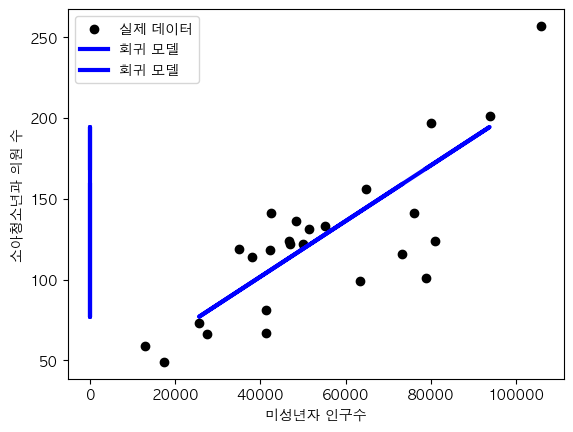

In [8]:
X = df[['미성년자인구수']]
X = sm.add_constant(X) # 상수항 추가
y = df['소아청소년과 의원 수']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 학습된 모델의 회귀 계수와 절편 확인
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

# 시각화
plt.scatter(X['미성년자인구수'], y, color='black', label='실제 데이터')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='회귀 모델')
plt.xlabel('미성년자 인구수')
plt.ylabel('소아청소년과 의원 수')
plt.legend()
plt.show()

In [9]:
y

0     201
1     141
2      66
3     257
4     114
5      49
6     131
7      59
8     101
9     136
10     67
11    116
12    122
13     99
14    141
15    124
16    197
17    118
18    133
19    156
20     81
21    122
22    124
23     73
24    119
Name: 소아청소년과 의원 수, dtype: int64

In [10]:
from scipy.stats import shapiro
print(shapiro(y-np.mean(y)))

ShapiroResult(statistic=0.9170117378234863, pvalue=0.04382031038403511)


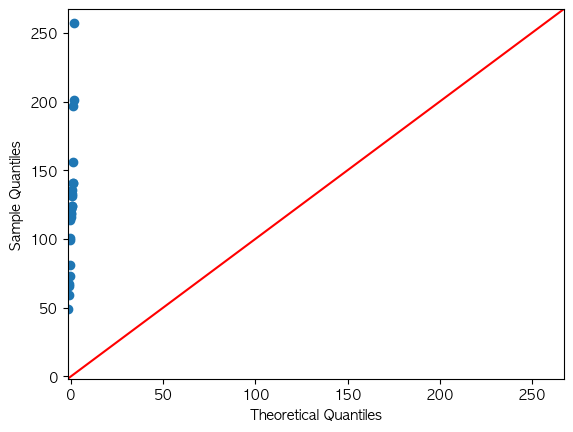

In [11]:
fig = sm.qqplot(y, line='45')
plt.show()

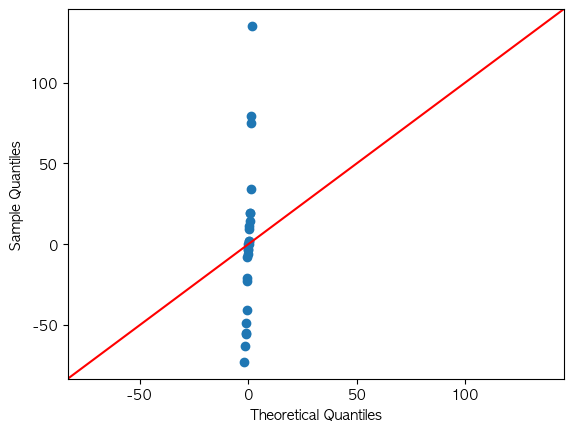

In [12]:
fig = sm.qqplot(y-np.mean(y), line='45')
plt.show()

(array([4., 2., 2., 9., 4., 1., 0., 2., 0., 1.]),
 array([-72.88, -52.08, -31.28, -10.48,  10.32,  31.12,  51.92,  72.72,
         93.52, 114.32, 135.12]),
 <BarContainer object of 10 artists>)

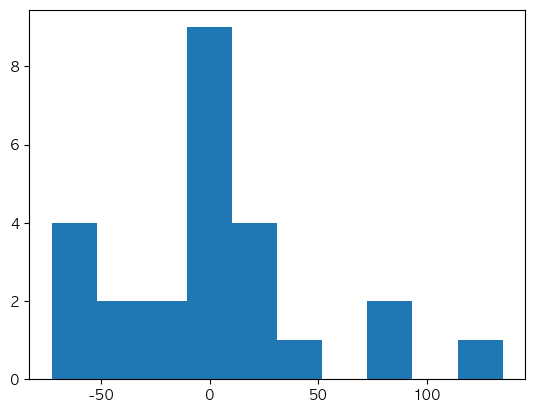

In [13]:
plt.hist(y-np.mean(y))

In [14]:
# 평균을 구하고
# redisual 
import numpy as np

np.mean(y)

121.88

In [15]:
y-np.mean(y)

0      79.12
1      19.12
2     -55.88
3     135.12
4      -7.88
5     -72.88
6       9.12
7     -62.88
8     -20.88
9      14.12
10    -54.88
11     -5.88
12      0.12
13    -22.88
14     19.12
15      2.12
16     75.12
17     -3.88
18     11.12
19     34.12
20    -40.88
21      0.12
22      2.12
23    -48.88
24     -2.88
Name: 소아청소년과 의원 수, dtype: float64

0.4326944053173065
잔차는 정규 분포를 따릅니다.


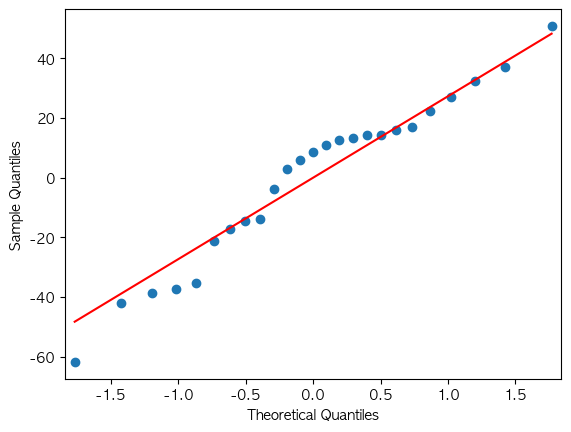

In [16]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

# 회귀 모델 학습
model = sm.OLS(y, X)
results = model.fit()

# 잔차 추출
residuals = results.resid

# 잔차 정규성 확인 - 잔차 플롯
sm.qqplot(residuals, line='s')

# 잔차 정규성 확인 - 정규성 검정
_, p_value = stats.shapiro(residuals)
alpha = 0.05  # 유의수준 설정

print(p_value)
if p_value > alpha:
    print("잔차는 정규 분포를 따릅니다.")
else:
    print("잔차는 정규 분포를 따르지 않습니다.")

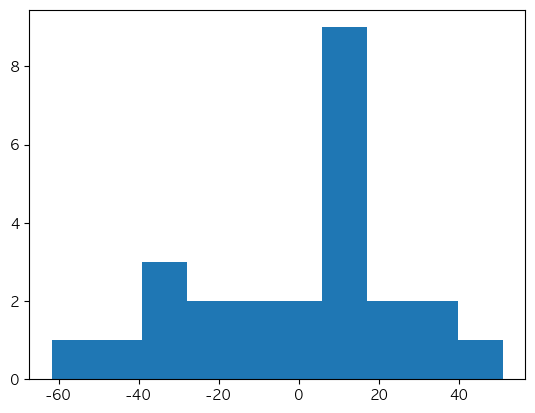

In [17]:
plt.hist(residuals)
fig.savefig('normality-hist.png')

In [18]:
residuals

0     14.371681
1    -17.186751
2    -13.681852
3     50.852770
4     16.987296
5    -14.637149
6     12.699930
7      2.745343
8    -61.736502
9     22.474757
10   -35.236075
11   -37.355656
12     5.961944
13   -38.505483
14    36.924733
15   -41.893996
16    32.403406
17    14.183570
18     8.603586
19    16.000997
20   -21.205529
21    10.879854
22    13.174061
23    -3.926279
24    27.101344
dtype: float64

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            소아청소년과 의원 수   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     42.52
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.18e-06
Time:                        11:02:08   Log-Likelihood:                -118.13
No. Observations:                  25   AIC:                             240.3
Df Residuals:                      23   BIC:                             242.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7197     14.386      2.483      0.021       5.959      65.480
미성년자인구수        0.0016      0.000      6.520      0.000       0.001       0.002
==============================================================================
Omnibus:                        1.071   Durbin-Watson:                   2.586
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                1.015
Skew:                          -0.421   Prob(JB):                        0.602
Kurtosis:                       2.484   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

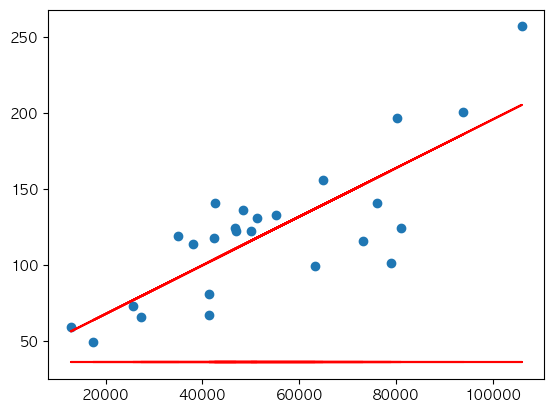

In [21]:
plt.scatter(X['미성년자인구수'], y)
plt.plot(X['미성년자인구수'], 0.0016*X+35.7197, 'r')
plt.show()

In [22]:
# 입력값으로 50000을 주고 해당하는 소아청소년과 의원 수를 예측
input_value = 50000
predicted_value = 0.0016*X+35.7197
print(f'입력값 {input_value}에 대한 소아청소년과 의원 수 예측: {predicted_value}')


입력값 50000에 대한 소아청소년과 의원 수 예측:       const   미성년자인구수
0   35.7213  185.9069
1   35.7213  157.6013
2   35.7213   79.4717
3   35.7213  205.3325
4   35.7213   96.7197
5   35.7213   63.5037
6   35.7213  117.9053
7   35.7213   56.1565
8   35.7213  162.1293
9   35.7213  113.1533
10  35.7213  101.9181
11  35.7213  152.7933
12  35.7213  115.6541
13  35.7213  137.0189
14  35.7213  103.7485
15  35.7213  165.2717
16  35.7213  163.9805
17  35.7213  103.4909
18  35.7213  123.9725
19  35.7213  139.5005
20  35.7213  101.8877
21  35.7213  110.7597
22  35.7213  110.4669
23  35.7213   76.7293
24  35.7213   91.6301


In [28]:
# 미성년자 인구수 열을 추출하여 2D 배열로 변환
X_values = df[['미성년자인구수']].values

# 예측값 계산
expectations =  0.0016*X+35.7197

# 결과를 "expectation" 컬럼에 추가
df['expectation'] = expectations['미성년자인구수']

In [29]:
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수,expectation
0,강남구,81053206.0,10,201,93867,185.9069
1,서초구,80510746.0,5,141,76176,157.6013
2,용산구,69795335.0,2,66,27345,79.4717
3,송파구,55703664.0,4,257,106008,205.3325
4,성동구,52498140.0,2,114,38125,96.7197
5,종로구,52233029.0,6,49,17365,63.5037
6,마포구,51249929.0,1,131,51366,117.9053
7,중구,49499323.0,3,59,12773,56.1565
8,양천구,49391500.0,5,101,79006,162.1293
9,영등포구,47450278.0,6,136,48396,113.1533


In [30]:
# expectation - 소아청소년과 의원의 수 => difference 라는 컬럼을 만듦
df['difference'] = df['expectation'] - df['소아청소년과 의원 수']
df

,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수,미성년자인구수,expectation,difference
0,강남구,81053206.0,10,201,93867,185.9069,-15.0931
1,서초구,80510746.0,5,141,76176,157.6013,16.6013
2,용산구,69795335.0,2,66,27345,79.4717,13.4717
3,송파구,55703664.0,4,257,106008,205.3325,-51.6675
4,성동구,52498140.0,2,114,38125,96.7197,-17.2803
5,종로구,52233029.0,6,49,17365,63.5037,14.5037
6,마포구,51249929.0,1,131,51366,117.9053,-13.0947
7,중구,49499323.0,3,59,12773,56.1565,-2.8435
8,양천구,49391500.0,5,101,79006,162.1293,61.1293
9,영등포구,47450278.0,6,136,48396,113.1533,-22.8467


In [31]:
import pandas as pd
import json
import folium
import plotly.express as px

with open("secret_key.json") as f: # path 
    secrets = json.loads(f.read())
    
YOUR_GOOGLE_MAPS_API_KEY = secrets['google_api_key']

geo_path = 'skorea_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

fig = px.choropleth(df, geojson=geo_json, locations='자치구', color='difference', color_continuous_scale='Blues',)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='인구수 대비 예상 의원의 수와 실제 의원의 수', title_font_size=20)

# mapbox 설정을 통해 크기 조절
fig.update_layout(
    mapbox=dict(
        style="open-street-map",  # mapbox 스타일 설정
        zoom=10,  # 지도 초기 줌 레벨
        center={"lat": 37.5665, "lon": 126.9780},  # 초기 중심 좌표
    )
)

# 지도 크기 조절
fig.update_layout(height=400, width=600)

# 플롯 표시
fig.show()